# Analyse Declarations

In [1]:
# Imports
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load log
import sys
sys.path.insert(1, '../')
from src.io import INT_DEC, DOM_DEC, read_log

id_log = read_log(INT_DEC)
dd_log = read_log(DOM_DEC) # -> Has no attribute for project number

In [3]:
# Function for checking whether a payment was eventually made for a declaration
def declaration_settled(declaration):
    for event in declaration:
        if (event["concept:name"] == "Payment Handled"):
            return True
    return False

In [4]:
def declaration_no_of_submissions(declaration):
    no_submitted = 0
    for event in declaration:
        if (event["concept:name"] == "Declaration SUBMITTED by EMPLOYEE"):
            no_submitted += 1
    return no_submitted

## Analyse how many international declarations have been booked on trips (Q2.1)

In [5]:
# Make sure declaration was actually handled
# Then check if project is set

id_total = 0
id_with_project = 0

for trace in id_log:
    was_payed = declaration_settled(trace)
    if (not was_payed):
        continue
    id_total += 1
    if (trace[0]["(case)_Permit_ProjectNumber"] != "UNKNOWN"):
        id_with_project += 1

print(f'There are {len(id_log)} traces in ID. {id_total} of them are actually handled including a payment. Of these, {id_with_project} have a project assigned (means not \'UNKNOWN\').')

    

There are 6323 traces in ID. 6078 of them are actually handled including a payment. Of these, 3878 have a project assigned (means not 'UNKNOWN').


## Analyse how many corrections have been made for declarations (Q2.2)

In [6]:
import seaborn as sns

id_resubmission_counter = Counter({1: 0, 2: 0, 3: 0, 4: 0})
for trace in id_log:
    was_payed = declaration_settled(trace)
    no_submissions = declaration_no_of_submissions(trace)
    if (was_payed & (no_submissions > 0)):
        if (no_submissions < 4):
            id_resubmission_counter[no_submissions] += 1
        else:
            id_resubmission_counter[4] += 1
dd_resubmission_counter = Counter({1: 0, 2: 0, 3: 0, 4: 0})
for trace in dd_log:
    was_payed = declaration_settled(trace)
    no_submissions = declaration_no_of_submissions(trace)
    if (was_payed & (no_submissions > 0)):
        if (no_submissions < 4):
            dd_resubmission_counter[no_submissions] += 1
        else:
            dd_resubmission_counter[4] += 1
        
print('International Declarations resubmissions:')
print(id_resubmission_counter)
print('Domestic Declarations resubmissions:')
print(dd_resubmission_counter)


International Declarations resubmissions:
Counter({1: 4709, 2: 1110, 3: 220, 4: 39})
Domestic Declarations resubmissions:
Counter({1: 8945, 2: 845, 3: 109, 4: 12})


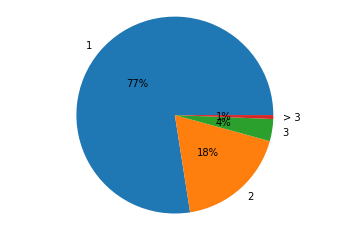

In [7]:
import matplotlib.pyplot as plt

# id_labels = list(id_resubmission_counter.keys())
id_sizes = list(id_resubmission_counter.values())

pie_labels = ['1', '2', '3', '> 3']


plt.pie(id_sizes, labels=pie_labels, autopct='%1.0f%%', pctdistance=0.5)
plt.axis('equal')
plt.show()

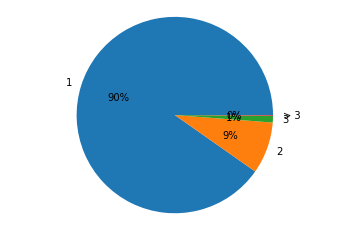

In [8]:

dd_sizes = list(dd_resubmission_counter.values())
plt.pie(dd_sizes, labels=pie_labels, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

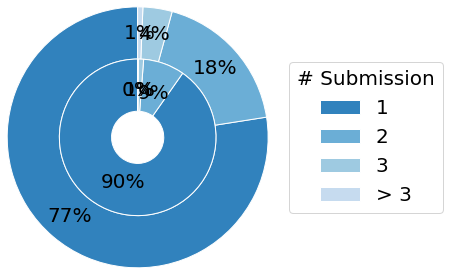

In [9]:
fig, ax = plt.subplots()

size = 0.6
radius = 1.5

cmap = plt.get_cmap("tab20c")
plt.rcParams.update({'font.size': 20})
colors=cmap([0,1,2,3,4,5,6,7])


ax.pie(id_sizes, labeldistance=0.8,
        radius=radius, colors=colors, 
        counterclock=True, startangle=90,
        autopct='%1.0f%%', pctdistance=0.8,
        wedgeprops=dict(width=size, edgecolor='w'))

wedges, texts, autotexts = ax.pie(dd_sizes, labeldistance=0.5,
        radius=radius-size, colors=colors,
        counterclock=True, startangle=90,
        autopct='%1.0f%%', pctdistance=0.6,
        wedgeprops=dict(width=size, edgecolor='w'))


ax.legend(wedges, pie_labels,
          title="# Submission",
          loc="center left",
          bbox_to_anchor=(1.15, 0, 0.6, 1))

ax.set(aspect="equal", title='')
plt.show()